In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
%matplotlib notebook

In [3]:
rawspec = pd.read_csv("../../Methods/SOAP/integrated_spectrum_full_reso_spot_prot_25.0_size_0.010_lat_0_phase_-0.5000.csv")
rawspec["Flux"] = rawspec.Flux.values/np.max(rawspec.Flux.values)
keep = np.where(rawspec.Wavelength.values >= 4850)[0]
rawspec = rawspec.iloc[keep]

<IPython.core.display.Javascript object>


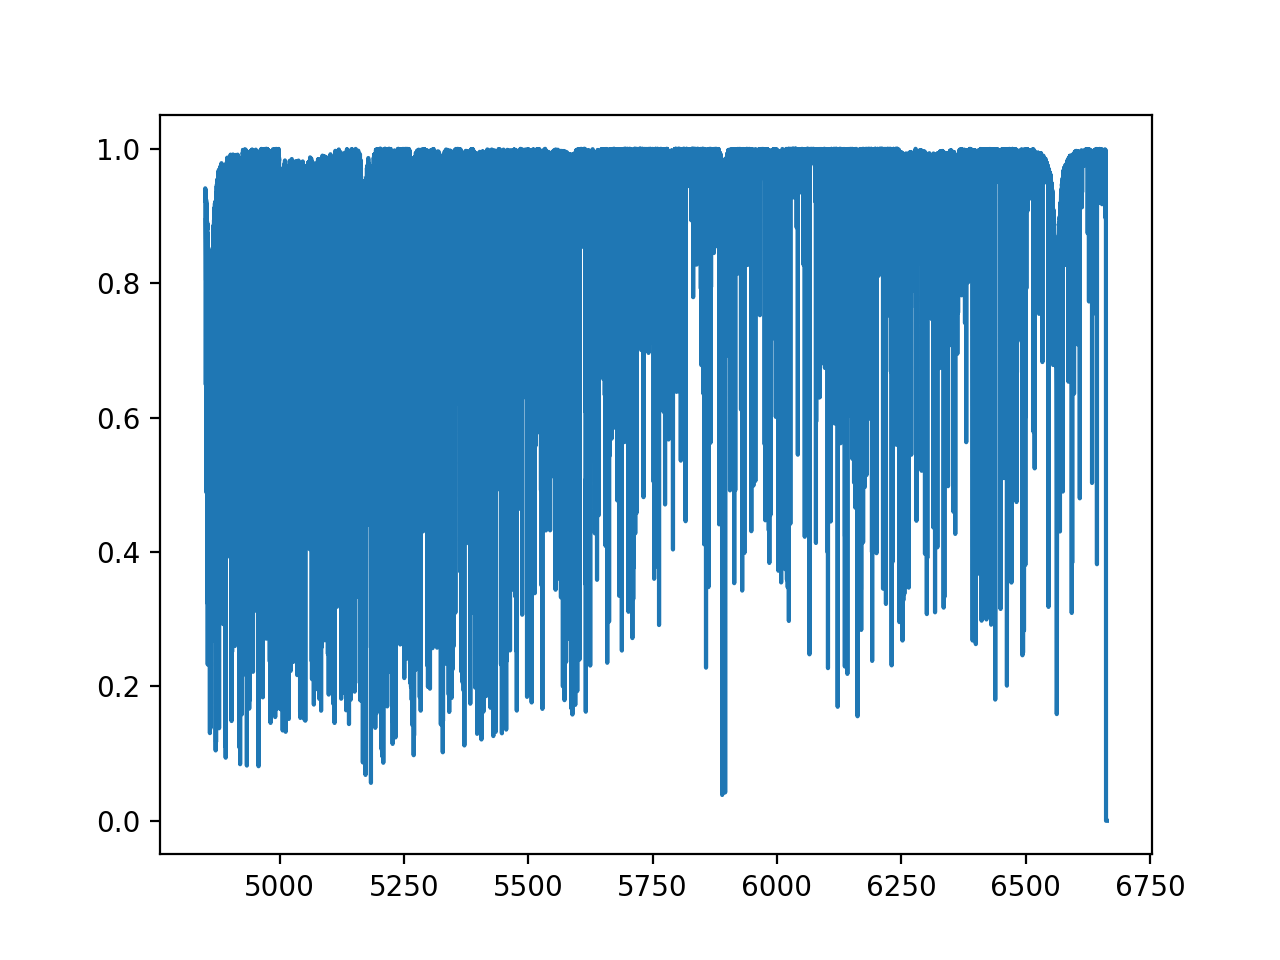

In [4]:
plt.plot(rawspec.Wavelength.values, rawspec.Flux.values)
plt.show()

To check how sensitive the SAFE is to having precise RV measurements provided (for accurate template estimation), we sample velocities between -5 m/s and 5 m/s and Doppler-shift each spectra by that amount. This is equivalent to all the spectra having a true RV of 0 m/s and the provided RV measurement being within 5 m/s of the truth.

In [5]:
import sys
sys.path.append("../")
from abfeature_functions import lowerSNR

In [10]:
np.random.seed(5)
rvs = 2*5*np.random.random(50) - 5
doppfacts = 1 + rvs/299792458
for i in range(len(rvs)):
    wvl = rawspec.Wavelength.values*doppfacts[i]
    flx = lowerSNR(rawspec.Flux.values, 200)
    unc = np.copy(np.sqrt(np.mean(rawspec.Flux.values)*rawspec.Flux.values)/200)
    spec = pd.DataFrame({"Wavelength": wvl, "Flux": flx, "Uncertainty": unc})
    spec.to_csv("spec%d.csv"%i)

# Analyze Estimated Template

In [4]:
temp = pd.read_csv("estimatedtemp.csv")

In [6]:
import sys
sys.path.append("../../App_to_EXPRES")
from wave_match import wave_match2

In [12]:
keep = np.where(temp.Wavelength.values > np.min(rawspec.Wavelength.values))[0]
rawinterpflx = wave_match2(rawspec.Wavelength.values, rawspec.Flux.values, temp.Wavelength.values)

<IPython.core.display.Javascript object>


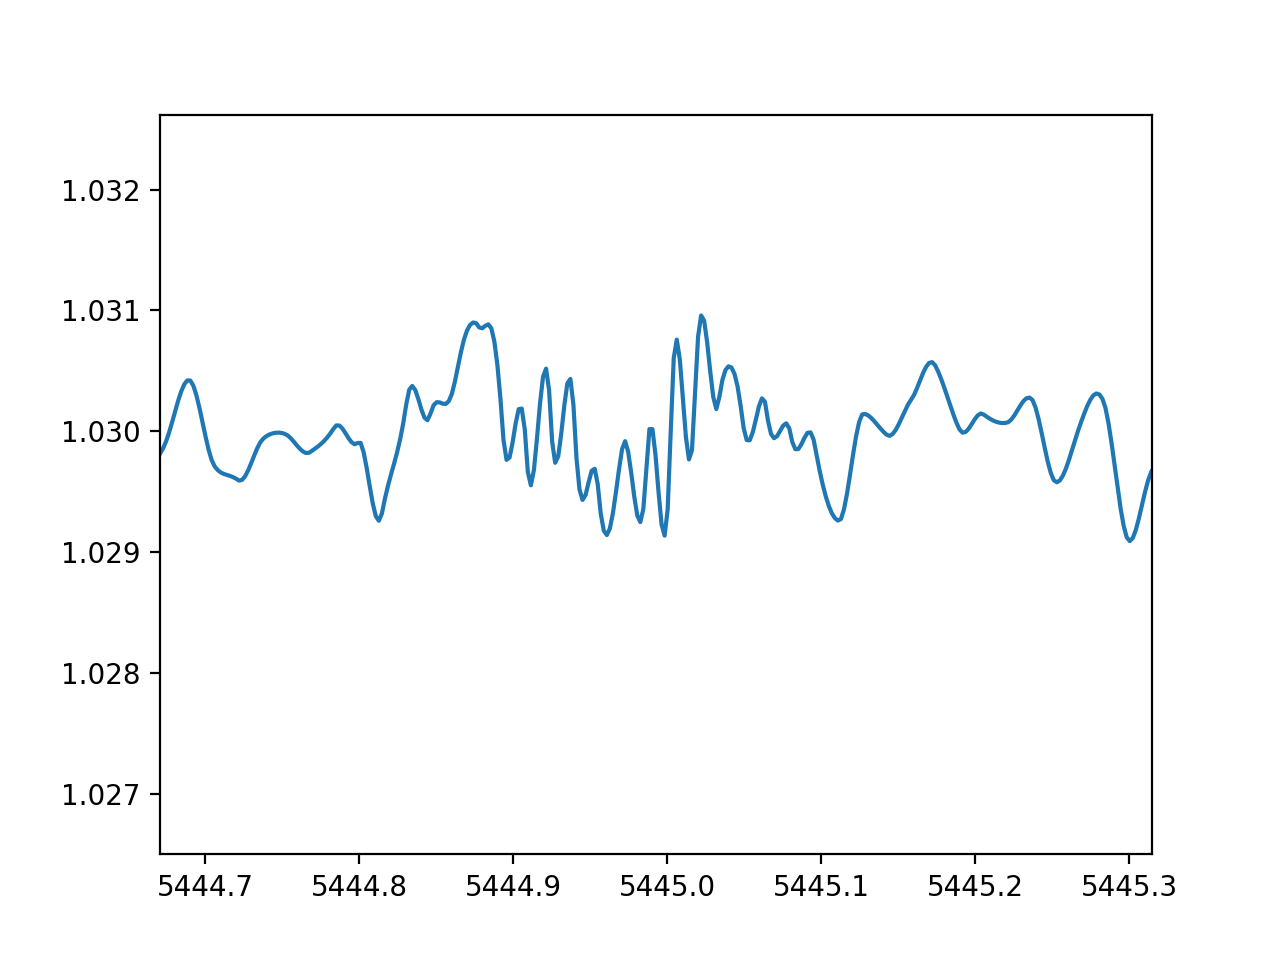

In [14]:
plt.plot(rawspec.Wavelength.values, rawspec.Flux.values, c='b')
plt.plot(temp.Wavelength.values[keep], temp.Flux.values[keep], c='r')
plt.plot(temp.Wavelength.values[keep], rawinterpflx - temp.Flux.values[keep] + 1.03*np.ones(len(rawinterpflx)))
plt.show()

# Analyze SAFE

In [11]:
safe = pd.read_csv("SAFE.csv")

In [12]:
safe.columns

Index(['Unnamed: 0', 'Filename', 'Pvals', 'SAFE', 'b1', 'b0', 'b2', 'b3', 'b4',
       'b5', 't1', 't0', 't2', 't3', 't4', 't5'],
      dtype='object')

In [13]:
safe.Pvals.values

array([0.50146977, 0.39434693, 0.17167964, 0.13304628, 0.66615861,
       0.71424216, 0.02550537, 0.68481422, 0.5026852 , 0.76623798,
       0.1924978 , 0.14342251, 0.14133819, 0.04312932, 0.78423051,
       0.01782777, 0.48238286, 0.11537456, 0.10357424, 0.07928174,
       0.28170051, 0.75076511, 0.08863586, 0.3257453 , 0.73118492,
       0.74189333, 0.42007143, 0.97193692, 0.54555241, 0.12631857,
       0.05001562, 0.78202788, 0.61881583, 0.25362521, 0.08952784,
       0.07990511, 0.22104899, 0.83325478, 0.42960338, 0.11658328,
       0.72395865, 0.42906904, 0.65249521, 0.15088378, 0.10643866,
       0.98827288, 0.76711547, 0.82221094, 0.0279244 , 0.9895308 ])

<IPython.core.display.Javascript object>


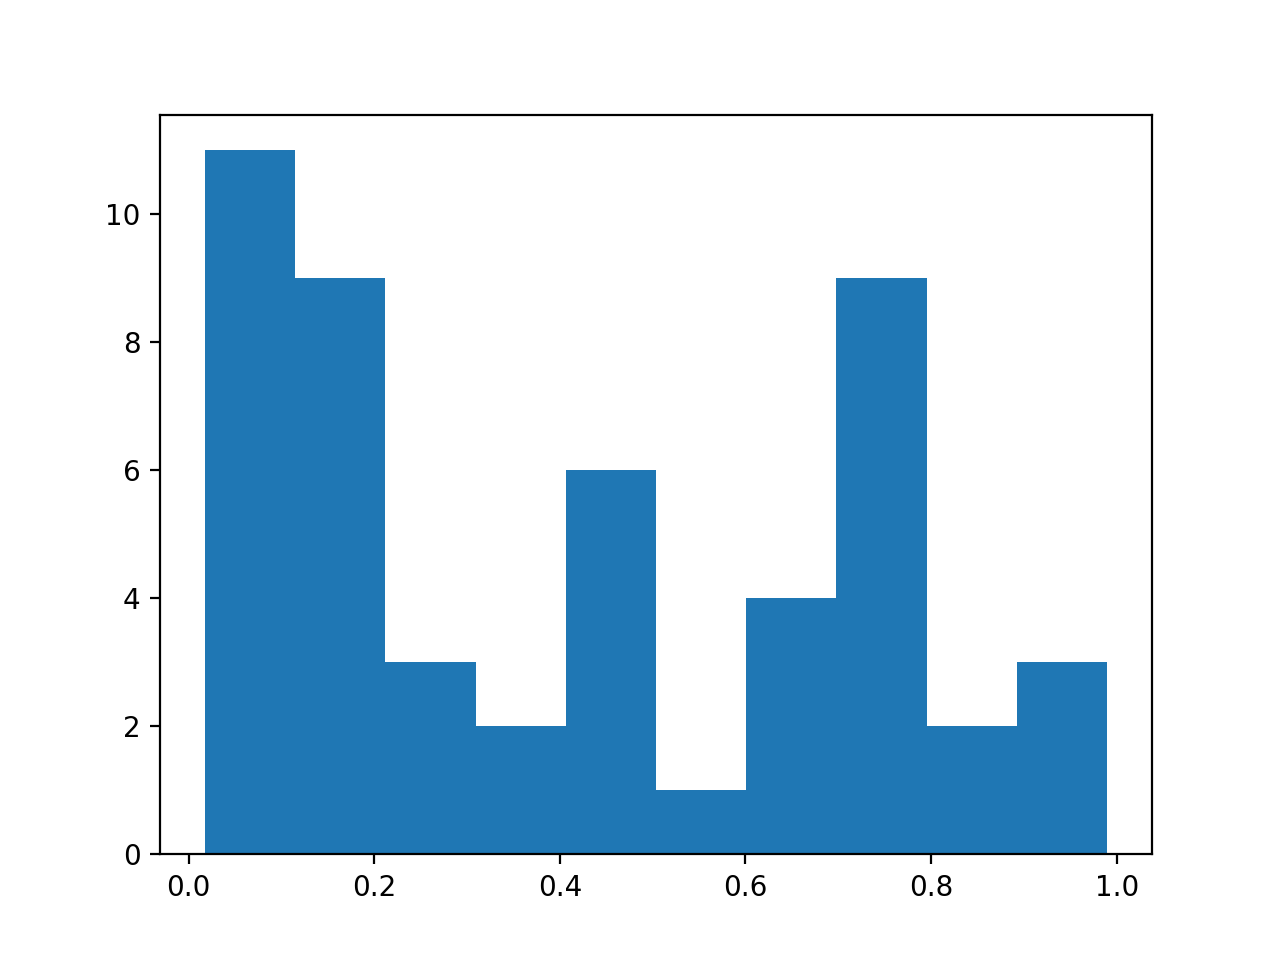

In [14]:
plt.hist(safe.Pvals.values)
plt.show()